##Make synthetic data

In [1]:
pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.4 MB/s eta 0:00:00


In [2]:

import pandas as pd
import numpy as np
import random
from faker import Faker
from datetime import datetime, timedelta

fake = Faker()

def generate_customer_data(num_records=1000):
    data = []
    phone_models = {
        'iPhone 15': '5G',
        'iPhone 14': '5G',
        'iPhone SE': '4G',
        'Samsung Galaxy S24': '5G',
        'Samsung Galaxy A54': '5G',
        'Samsung Galaxy A14': '4G',
        'Xiaomi Redmi Note 13': '5G',
        'Xiaomi Redmi 12': '4G',
        'Oppo Reno 10': '5G',
        'Huawei Nova 11': '4G'
    }
    locations = ['Giza', 'Alexandria', 'Cairo', 'Sharqia', 'Dakahlia', 'Beheira', 'Minya', 'Qalyubia', 'Asyut', 'Sohag']
    package_types = ['Red Classic', 'Red Advance', 'Red Elite', 'Flex 60', 'Flex 100', 'Flex 200', 'Flex 400', 'Internet Bundle 10GB', 'Internet Bundle 50GB', 'Internet Bundle 100GB']
    payment_methods = ['Credit Card', 'Cash', 'Vodafone Cash']
    network_quality_options = ['Poor', 'Good']

    for i in range(num_records):
        customer_id = i + 1
        full_name = fake.name()
        age = random.randint(18, 70)
        gender = random.choice(['Male', 'Female'])
        location = random.choice(locations)
        phone_number = '01' + str(random.choice([0, 1, 2, 5])) + ''.join([str(random.randint(0, 9)) for _ in range(8)])
        sim_serial_number = ''.join(random.choices('ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789', k=20))
        phone_model = random.choice(list(phone_models.keys()))
        _4g_or_5g_capable = phone_models[phone_model]

        plan_type = random.choices(['Prepaid', 'Postpaid'], weights=[0.7, 0.3], k=1)[0]

        if plan_type == 'Prepaid':
            avg_monthly_calls = round(random.uniform(0, 500), 2)
            avg_monthly_sms = random.randint(0, 200)
            avg_monthly_data_gb = round(random.uniform(0, 50), 2)
            avg_monthly_spend = round(random.uniform(50, 500), 2)
            customer_tenure = random.randint(1, 60) # up to 5 years
        else: # Postpaid
            avg_monthly_calls = round(random.uniform(100, 1000), 2)
            avg_monthly_sms = random.randint(50, 500)
            avg_monthly_data_gb = round(random.uniform(20, 200), 2)
            avg_monthly_spend = round(random.uniform(300, 2000), 2)
            customer_tenure = random.randint(12, 240) # 1 to 20 years

        package_type = random.choice(package_types)
        vodafone_cash_usage = round(random.uniform(0, 500), 2) if random.random() < 0.6 else 0 # 60% chance of usage
        eshop_usage_count = random.randint(0, 20)

        interconnected_relative_package = random.choices(['Wife', 'Husband', 'None'], weights=[0.1, 0.1, 0.8], k=1)[0]

        churn_probability = round(random.uniform(0, 1), 2)
        churn_status = 'Churned' if churn_probability > 0.7 else 'Active'

        payment_method = random.choice(payment_methods)
        network_quality_issues_logged = random.randint(0, 5) if random.random() < 0.3 else 0 # 30% chance of issues
        customer_support_interaction_count = random.randint(0, 10)
        promotional_offers_used = random.randint(0, 5)

        device_purchase_date = (datetime.now() - timedelta(days=random.randint(30, 730))).strftime('%Y-%m-%d') # Last 2 years
        data_speed_coverage_quality = random.choice(network_quality_options)
        cash_wallet_spend_per_month = round(random.uniform(0, 300), 2) if random.random() < 0.5 else 0 # 50% chance of usage

        record = [
            customer_id, full_name, age, gender, location, phone_number, sim_serial_number,
            phone_model, _4g_or_5g_capable, avg_monthly_calls, avg_monthly_sms,
            avg_monthly_data_gb, avg_monthly_spend, plan_type, customer_tenure,
            package_type, vodafone_cash_usage, eshop_usage_count,
            interconnected_relative_package, churn_probability, churn_status, payment_method,
            network_quality_issues_logged, customer_support_interaction_count, promotional_offers_used,
            device_purchase_date, data_speed_coverage_quality, cash_wallet_spend_per_month
        ]

        # Introduce dirtiness
        # Missing values
        if random.random() < 0.05: # 5% missing age
            record[2] = np.nan
        if random.random() < 0.03: # 3% missing location
            record[4] = None
        if random.random() < 0.07: # 7% missing AvgMonthlyDataGB
            record[11] = np.nan
        if random.random() < 0.02: # 2% missing PlanType
            record[13] = None
        if random.random() < 0.10: # 10% missing VodafoneCashUsage
            record[16] = np.nan

        # Outliers
        if random.random() < 0.01: # 1% extreme AvgMonthlySpend
            record[12] = round(random.uniform(5000, 10000), 2)
        if random.random() < 0.005: # 0.5% extreme AvgMonthlyDataGB
            record[11] = round(random.uniform(500, 1000), 2)

        # Inconsistencies
        if random.random() < 0.02: # 2% inconsistent 4G/5G capability
            current_capability = record[8]
            record[8] = '4G' if current_capability == '5G' else '5G'
        if random.random() < 0.01: # 1% inconsistent tenure for plan type
            if record[13] == 'Prepaid' and record[14] > 100: # Prepaid with very long tenure
                record[14] = random.randint(1, 30)
            elif record[13] == 'Postpaid' and record[14] < 10: # Postpaid with very short tenure
                record[14] = random.randint(60, 120)

        data.append(record)

    df = pd.DataFrame(data, columns=[
        'CustomerID', 'FullName', 'Age', 'Gender', 'Location', 'PhoneNumber', 'SIMSerialNumber',
        'PhoneModel', '4G_or_5G_Capable', 'AvgMonthlyCalls', 'AvgMonthlySMS',
        'AvgMonthlyDataGB', 'AvgMonthlySpend', 'PlanType', 'CustomerTenure',
        'PackageType', 'VodafoneCashUsage', 'EshopUsageCount',
        'InterconnectedRelativePackage', 'ChurnProbability', 'ChurnStatus', 'PaymentMethod',
        'NetworkQualityIssuesLogged', 'CustomerSupportInteractionCount', 'PromotionalOffersUsed',
        'DevicePurchaseDate', 'DataSpeedCoverageQuality', 'CashWalletSpendPerMonth'
    ])
    return df

if __name__ == '__main__':
    df = generate_customer_data(num_records=100000) # Generate 5000 records
    df.to_csv('customer_segmentation_dirty_data.csv', index=False)
    print('Dirty data generated and saved to customer_segmentation_dirty_data.csv')




Dirty data generated and saved to customer_segmentation_dirty_data.csv


In [3]:
print("Dirty data sample:")
df.head(5)


Dirty data sample:


,CustomerID,FullName,Age,Gender,Location,PhoneNumber,SIMSerialNumber,PhoneModel,4G_or_5G_Capable,AvgMonthlyCalls,...,InterconnectedRelativePackage,ChurnProbability,ChurnStatus,PaymentMethod,NetworkQualityIssuesLogged,CustomerSupportInteractionCount,PromotionalOffersUsed,DevicePurchaseDate,DataSpeedCoverageQuality,CashWalletSpendPerMonth
0,1,Sheila White,40.0,Female,Sharqia,01280394077,R21H9LJHKY0J0HCCSY6B,Huawei Nova 11,4G,350.88,...,None,0.63,Active,Cash,4,3,5,2024-11-16,Good,0.00
1,2,Joseph Cherry,63.0,Male,Dakahlia,01579551141,7ISF41B08JC3T65E2JP6,Oppo Reno 10,5G,59.43,...,Wife,0.46,Active,Cash,0,1,2,2024-07-03,Poor,0.00
2,3,Jeffrey Brock,22.0,Male,Sohag,01281818017,KXE3NIH5IG8CG4UQAK6L,Samsung Galaxy A14,4G,235.05,...,Wife,0.40,Active,Cash,4,2,3,2024-07-01,Good,0.00
3,4,Ethan Brewer,23.0,Male,Qalyubia,01512692517,NF8AXHLE18SSZVQ5RCD1,Huawei Nova 11,4G,102.67,...,None,0.22,Active,Credit Card,0,6,5,2024-12-26,Good,0.00
4,5,Keith Hoffman,26.0,Female,Sohag,01010021404,MIBLUAXURU25956VO1RO,Huawei Nova 11,4G,117.48,...,None,0.26,Active,Vodafone Cash,0,5,2,2024-09-02,Good,58.63


## EDA

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load the dataset
df = pd.read_csv("customer_segmentation_dirty_data.csv")


In [5]:
print("\n--- Dataset Info (Dirty Data) ---")
df.info()

print("\n--- Descriptive Statistics (Dirty Data) ---")
print(df.describe())



--- Dataset Info (Dirty Data) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   CustomerID                       100000 non-null  int64  
 1   FullName                         100000 non-null  object 
 2   Age                              94932 non-null   float64
 3   Gender                           100000 non-null  object 
 4   Location                         96988 non-null   object 
 5   PhoneNumber                      100000 non-null  int64  
 6   SIMSerialNumber                  100000 non-null  object 
 7   PhoneModel                       100000 non-null  object 
 8   4G_or_5G_Capable                 100000 non-null  object 
 9   AvgMonthlyCalls                  100000 non-null  float64
 10  AvgMonthlySMS                    100000 non-null  int64  
 11  AvgMonthlyDataGB               

In [6]:
print("\n--- Missing Values Count ---")
print(df.isnull().sum())

print("\n--- Missing Values Percentage ---")
print((df.isnull().sum() / len(df)) * 100)



--- Missing Values Count ---
CustomerID                             0
FullName                               0
Age                                 5068
Gender                                 0
Location                            3012
PhoneNumber                            0
SIMSerialNumber                        0
PhoneModel                             0
4G_or_5G_Capable                       0
AvgMonthlyCalls                        0
AvgMonthlySMS                          0
AvgMonthlyDataGB                    6983
AvgMonthlySpend                        0
PlanType                            2022
CustomerTenure                         0
PackageType                            0
VodafoneCashUsage                   9887
EshopUsageCount                        0
InterconnectedRelativePackage      80001
ChurnProbability                       0
ChurnStatus                            0
PaymentMethod                          0
NetworkQualityIssuesLogged             0
CustomerSupportInteractionC

In [7]:
print("\n--- Outlier Detection (Numerical Columns) ---")
numerical_cols = [
    "Age", "AvgMonthlyCalls", "AvgMonthlySMS", "AvgMonthlyDataGB", "AvgMonthlySpend",
    "CustomerTenure", "EshopUsageCount", "VodafoneCashUsage", "ChurnProbability",
    "NetworkQualityIssuesLogged", "CustomerSupportInteractionCount", "PromotionalOffersUsed",
    "CashWalletSpendPerMonth"
]

for col in numerical_cols:
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        if not outliers.empty:
            print(f"\nOutliers in {col}: {len(outliers)} records")



--- Outlier Detection (Numerical Columns) ---

Outliers in AvgMonthlyCalls: 3713 records

Outliers in AvgMonthlySMS: 8741 records

Outliers in AvgMonthlyDataGB: 15169 records

Outliers in AvgMonthlySpend: 14067 records

Outliers in CustomerTenure: 16255 records

Outliers in NetworkQualityIssuesLogged: 14902 records


In [8]:
print("\n--- Inconsistency Checks ---")

phone_model_capabilities = {
    'iPhone 15': '5G',
    'iPhone 14': '5G',
    'iPhone SE': '4G',
    'Samsung Galaxy S24': '5G',
    'Samsung Galaxy A54': '5G',
    'Samsung Galaxy A14': '4G',
    'Xiaomi Redmi Note 13': '5G',
    'Xiaomi Redmi 12': '4G',
    'Oppo Reno 10': '5G',
    'Huawei Nova 11': '4G'
}

inconsistent_4g5g = df[
    df.apply(
        lambda row: row["4G_or_5G_Capable"] != phone_model_capabilities.get(row["PhoneModel"]),
        axis=1
    )
]
if not inconsistent_4g5g.empty:
    print(f"\nInconsistent 4G/5G Capable values: {len(inconsistent_4g5g)} records")

long_prepaid_tenure = df[(df["PlanType"] == "Prepaid") & (df["CustomerTenure"] > 100)]
if not long_prepaid_tenure.empty:
    print(f"\nPrepaid customers with unusually long tenure: {len(long_prepaid_tenure)} records")

short_postpaid_tenure = df[(df["PlanType"] == "Postpaid") & (df["CustomerTenure"] < 10)]
if not short_postpaid_tenure.empty:
    print(f"\nPostpaid customers with unusually short tenure: {len(short_postpaid_tenure)} records")



--- Inconsistency Checks ---

Inconsistent 4G/5G Capable values: 1957 records


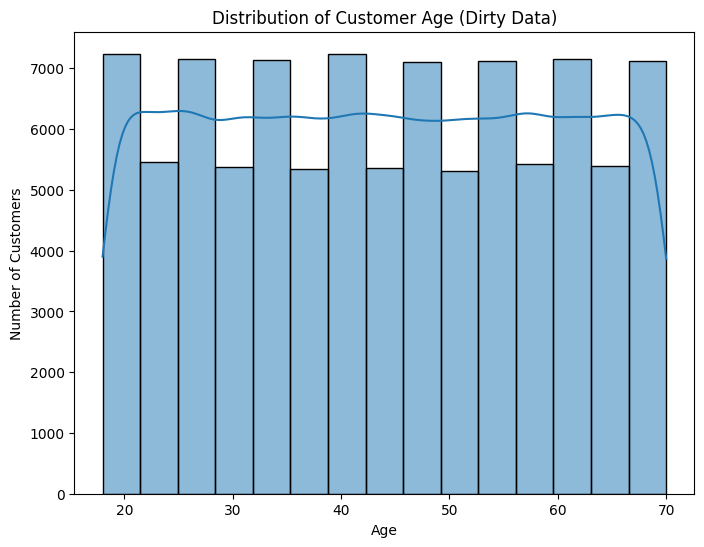

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Age"].dropna(), bins=15, kde=True)
plt.title("Distribution of Customer Age (Dirty Data)")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.savefig("age_distribution_dirty.png")


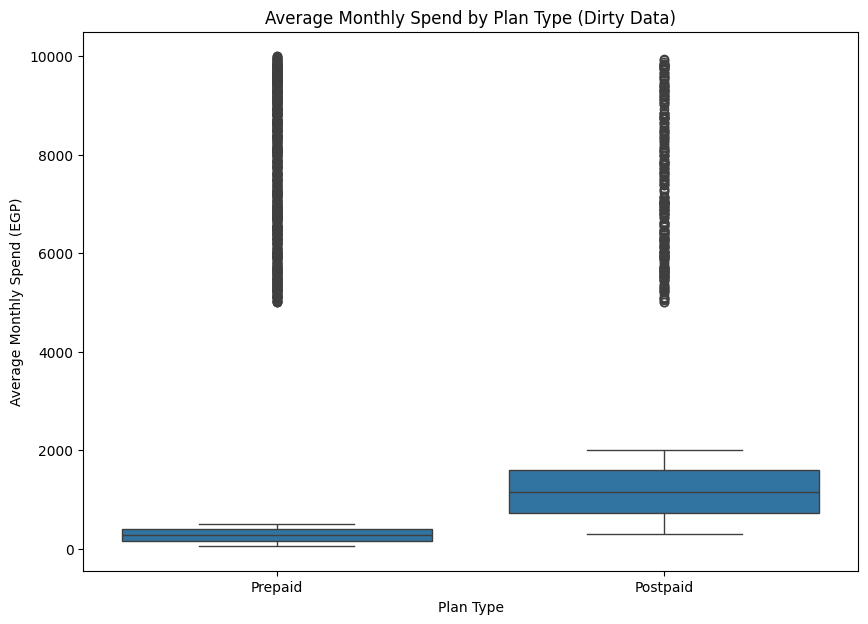

In [10]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="PlanType", y="AvgMonthlySpend",
            data=df.dropna(subset=["PlanType", "AvgMonthlySpend"]))
plt.title("Average Monthly Spend by Plan Type (Dirty Data)")
plt.xlabel("Plan Type")
plt.ylabel("Average Monthly Spend (EGP)")
plt.savefig("spend_by_plan_type_dirty.png")


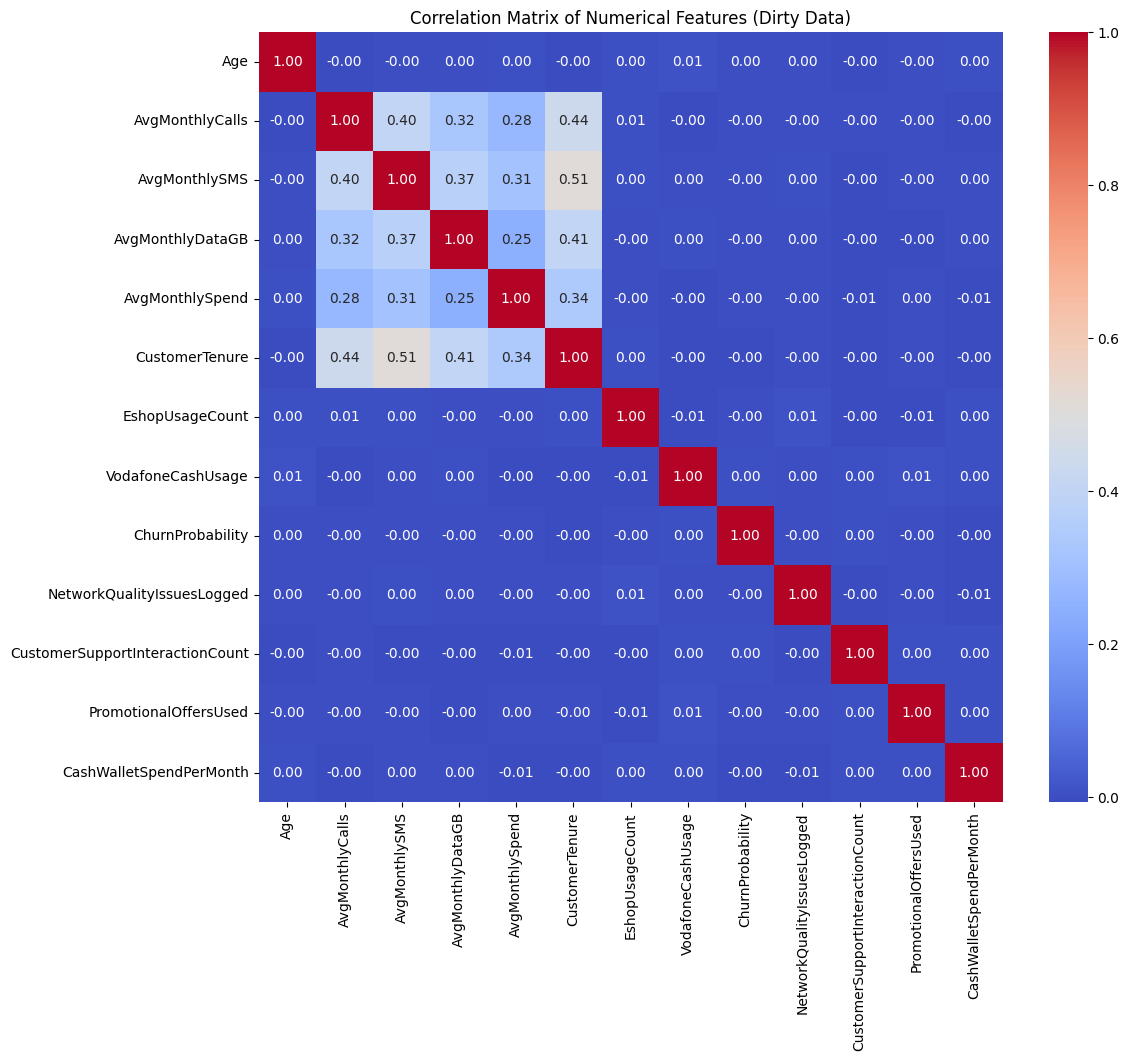

In [11]:
plt.figure(figsize=(12, 10))
numerical_cols_for_corr = [
    "Age", "AvgMonthlyCalls", "AvgMonthlySMS", "AvgMonthlyDataGB", "AvgMonthlySpend",
    "CustomerTenure", "EshopUsageCount", "VodafoneCashUsage", "ChurnProbability",
    "NetworkQualityIssuesLogged", "CustomerSupportInteractionCount", "PromotionalOffersUsed",
    "CashWalletSpendPerMonth"
]
sns.heatmap(df[numerical_cols_for_corr].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features (Dirty Data)")
plt.savefig("correlation_matrix_dirty.png")


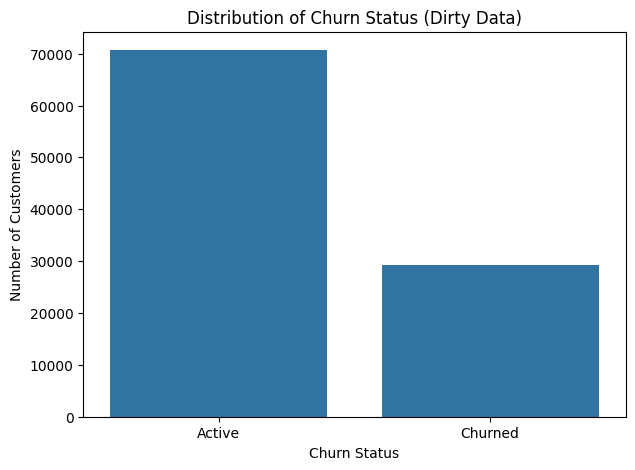

In [12]:
plt.figure(figsize=(7, 5))
sns.countplot(x="ChurnStatus", data=df)
plt.title("Distribution of Churn Status (Dirty Data)")
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")
plt.savefig("churn_status_distribution_dirty.png")


Analysis of dirty data and visualizations complete. Images saved.


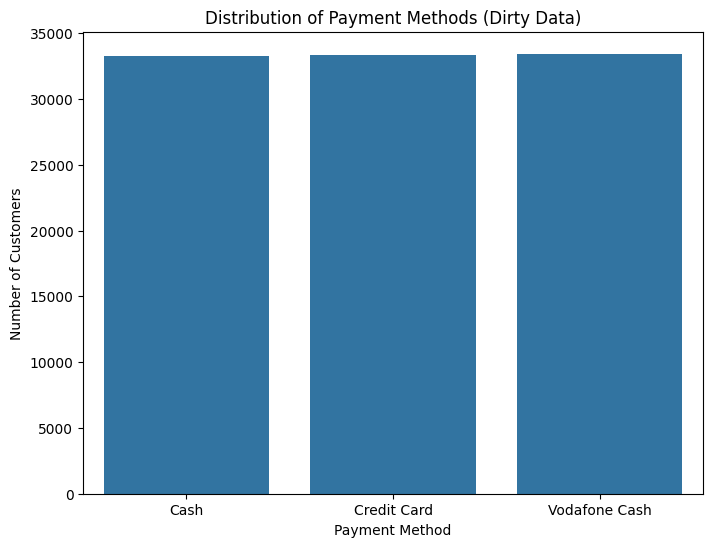

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x="PaymentMethod", data=df)
plt.title("Distribution of Payment Methods (Dirty Data)")
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.savefig("payment_method_distribution_dirty.png")

print("Analysis of dirty data and visualizations complete. Images saved.")


## Cleaning

### EDA - Visualizations

This section of the code generates several visualizations to understand the distribution of key features and identify potential issues in the dirty dataset.

- **Distribution of Customer Age:** A histogram with a Kernel Density Estimate (KDE) is generated to show the distribution of customer ages. This helps in understanding the age demographics of the customer base.
- **Average Monthly Spend by Plan Type:** A box plot is created to visualize the distribution of average monthly spend for different plan types (Prepaid and Postpaid). This helps in comparing spending patterns between the two plan types and identifying potential outliers.
- **Correlation Matrix of Numerical Features:** A heatmap is generated to show the correlation between the numerical features in the dataset. This helps in identifying relationships between different variables, which can be useful for feature selection and understanding data patterns.
- **Distribution of Churn Status:** A count plot is created to visualize the distribution of churned and active customers. This helps in understanding the class imbalance in the target variable (ChurnStatus).
- **Distribution of Payment Methods:** A count plot is generated to show the distribution of different payment methods used by customers. This provides insights into the preferred payment methods.

In [14]:
from sklearn.preprocessing import StandardScaler


In [15]:
def preprocess_customer_data(df):
    # Make a copy to avoid SettingWithCopyWarning
    df_processed = df.copy()

    # --- 1. Handle Missing Values ---
    df_processed["Age"].fillna(df_processed["Age"].median(), inplace=True)
    df_processed["Location"].fillna(df_processed["Location"].mode()[0], inplace=True)
    df_processed["AvgMonthlyDataGB"].fillna(df_processed["AvgMonthlyDataGB"].median(), inplace=True)
    df_processed["PlanType"].fillna(df_processed["PlanType"].mode()[0], inplace=True)
    df_processed["VodafoneCashUsage"].fillna(0, inplace=True)
    df_processed["InterconnectedRelativePackage"].fillna("None", inplace=True)

    # --- 2. Handle Outliers (IQR capping) ---
    numerical_cols = [
        "AvgMonthlyCalls", "AvgMonthlySMS", "AvgMonthlyDataGB", "AvgMonthlySpend",
        "CustomerTenure", "EshopUsageCount", "VodafoneCashUsage", "ChurnProbability",
        "NetworkQualityIssuesLogged", "CustomerSupportInteractionCount", "PromotionalOffersUsed",
        "CashWalletSpendPerMonth"
    ]
    for col in numerical_cols:
        if pd.api.types.is_numeric_dtype(df_processed[col]):
            Q1 = df_processed[col].quantile(0.25)
            Q3 = df_processed[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_processed[col] = np.where(df_processed[col] < lower_bound, lower_bound, df_processed[col])
            df_processed[col] = np.where(df_processed[col] > upper_bound, upper_bound, df_processed[col])

    # --- 3. Handle Inconsistencies ---
    phone_model_capabilities = {
        'iPhone 15': '5G', 'iPhone 14': '5G', 'iPhone SE': '4G',
        'Samsung Galaxy S24': '5G', 'Samsung Galaxy A54': '5G', 'Samsung Galaxy A14': '4G',
        'Xiaomi Redmi Note 13': '5G', 'Xiaomi Redmi 12': '4G',
        'Oppo Reno 10': '5G', 'Huawei Nova 11': '4G'
    }
    for index, row in df_processed.iterrows():
        if row["PhoneModel"] in phone_model_capabilities:
            df_processed.loc[index, "4G_or_5G_Capable"] = phone_model_capabilities[row["PhoneModel"]]

    df_processed.loc[(df_processed["PlanType"] == "Prepaid") & (df_processed["CustomerTenure"] > 60), "CustomerTenure"] = 60
    df_processed.loc[(df_processed["PlanType"] == "Postpaid") & (df_processed["CustomerTenure"] < 12), "CustomerTenure"] = 12

    # --- 4. Feature Engineering / Type Conversion ---
    df_processed["DevicePurchaseDate"] = pd.to_datetime(df_processed["DevicePurchaseDate"])

    # Optionally: One-hot encoding & scaling
    # df_processed = pd.get_dummies(df_processed, columns=["Gender", "Location", "PhoneModel",
    #     "4G_or_5G_Capable", "PlanType", "PackageType", "InterconnectedRelativePackage",
    #     "ChurnStatus", "PaymentMethod", "DataSpeedCoverageQuality"], drop_first=True)

    # scaler = StandardScaler()
    # df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

    return df_processed


In [16]:
dirty_df = pd.read_csv("customer_segmentation_dirty_data.csv")

print("\n--- Original Dirty Data Info ---")
dirty_df.info()

print("\n--- Original Dirty Data Missing Values ---")
print(dirty_df.isnull().sum())



--- Original Dirty Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   CustomerID                       100000 non-null  int64  
 1   FullName                         100000 non-null  object 
 2   Age                              94932 non-null   float64
 3   Gender                           100000 non-null  object 
 4   Location                         96988 non-null   object 
 5   PhoneNumber                      100000 non-null  int64  
 6   SIMSerialNumber                  100000 non-null  object 
 7   PhoneModel                       100000 non-null  object 
 8   4G_or_5G_Capable                 100000 non-null  object 
 9   AvgMonthlyCalls                  100000 non-null  float64
 10  AvgMonthlySMS                    100000 non-null  int64  
 11  AvgMonthlyDataGB                

In [17]:
cleaned_df = preprocess_customer_data(dirty_df)


/tmp/ipython-input-3110858046.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed["Age"].fillna(df_processed["Age"].median(), inplace=True)
/tmp/ipython-input-3110858046.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [18]:
# Save cleaned data
cleaned_df.to_csv("customer_segmentation_cleaned_data.csv", index=False)

print("\n--- Cleaned Data Info ---")
cleaned_df.info()

print("\n--- Cleaned Data Missing Values ---")
print(cleaned_df.isnull().sum())

print("\nCleaned data saved to customer_segmentation_cleaned_data.csv")



--- Cleaned Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   CustomerID                       100000 non-null  int64         
 1   FullName                         100000 non-null  object        
 2   Age                              100000 non-null  float64       
 3   Gender                           100000 non-null  object        
 4   Location                         100000 non-null  object        
 5   PhoneNumber                      100000 non-null  int64         
 6   SIMSerialNumber                  100000 non-null  object        
 7   PhoneModel                       100000 non-null  object        
 8   4G_or_5G_Capable                 100000 non-null  object        
 9   AvgMonthlyCalls                  100000 non-null  float64       
 10  AvgMonthlySMS     